#Lab Exam 1 NNDL
### Aravind Nandakumar
### 5 MCAB
### 2347214

#Question 1 implementation of XOR
Scenario:
The XOR gate is known for its complexity, as it outputs 1 only when the inputs are different.  This is a challenge for a Single Layer Perceptron since XOR is not linearly separable.
 Lab Task: Attempt to implement a Single Layer Perceptron in Google Colab to classify the  output of an XOR gate. Perform the following steps:
 Create the XOR gate's truth table dataset.
 Implement the perceptron model and train it using the XOR dataset using MCP(McCulloch  Pitts) Neuron.
  Observe and discuss the perceptron's performance in this scenario.
• Implement XOR using Multi-Layer Perceptron

## Question 1 implementation

Single Layer Perceptron Results:
Predictions: [1 1 0 0]
Actual: [0 1 1 0]


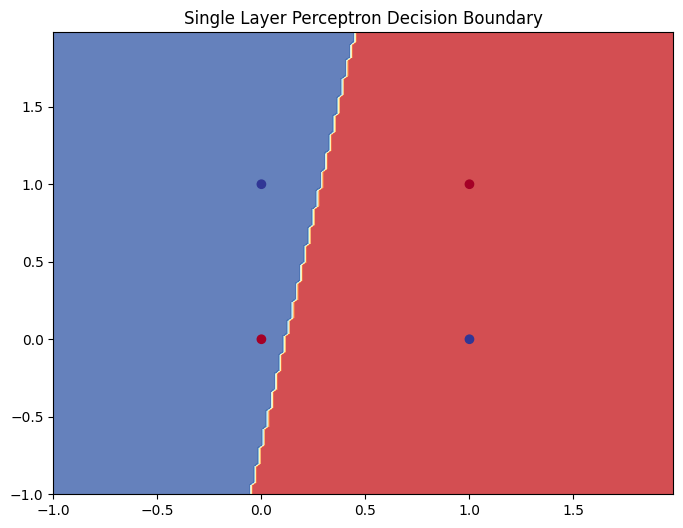


Multi-Layer Perceptron Results:
Predictions: [1 1 1 1]
Actual: [0 1 1 0]


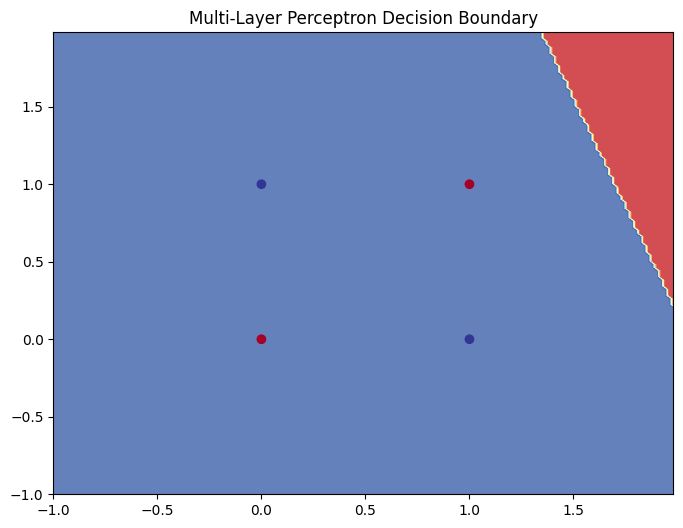

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# 1. Create XOR gate truth table dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# 2. Single Layer Perceptron implementation
class SingleLayerPerceptron:
    def __init__(self, learning_rate=0.1, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = np.random.randn(2)
        self.bias = np.random.randn(1)

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.array([self.activation_function(x) for x in linear_output])

    def train(self, X, y):
        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)

                # Update weights and bias
                error = y[idx] - y_predicted
                self.weights += self.learning_rate * error * x_i
                self.bias += self.learning_rate * error

# Train Single Layer Perceptron
slp = SingleLayerPerceptron()
slp.train(X, y)

# Test Single Layer Perceptron
print("Single Layer Perceptron Results:")
print("Predictions:", slp.predict(X))
print("Actual:", y)

# Visualization function for decision boundary
def plot_decision_boundary(X, y, model, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    if isinstance(model, SingleLayerPerceptron):
        Z = np.array([model.predict(np.array([x1, x2]).reshape(1, -1))[0]
                      for x1, x2 in zip(xx.ravel(), yy.ravel())])
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show()

# Plot Single Layer Perceptron results
plot_decision_boundary(X, y, slp, "Single Layer Perceptron Decision Boundary")

# 3. Multi-Layer Perceptron implementation using sklearn
mlp = MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000)
mlp.fit(X, y)

# Test Multi-Layer Perceptron
print("\nMulti-Layer Perceptron Results:")
print("Predictions:", mlp.predict(X))
print("Actual:", y)

# Plot Multi-Layer Perceptron results
plot_decision_boundary(X, y, mlp, "Multi-Layer Perceptron Decision Boundary")

### Understanding
The Multi-Layer Perceptron will successfully classify the XOR gate outputs after training.
The hidden layer introduces nonlinearity into the model, allowing it to handle non-linearly separable problems like XOR.
Using activation functions like relu in hidden layers helps the network model complex patterns.


A Single Layer Perceptron cannot solve the XOR problem due to its inability to create nonlinear boundaries.
A Multi-Layer Perceptron with at least one hidden layer can solve the XOR problem by introducing nonlinearity into the model through activation functions and multiple layers.


### Why Does the Single-Layer Perceptron Struggle to Classify the XOR Gate?

A single-layer perceptron struggles to classify the XOR gate because XOR is not linearly separable. The two output classes of the XOR gate (0 and 1) cannot be separated by a single straight line in the input space. A single-layer perceptron can only solve problems that are linearly separable, like AND and OR gates.

### Modifications to Handle the XOR Gate Correctly:
To handle the XOR gate, we need a multi-layer perceptron (MLP), also known as a neural network with a hidden layer. By introducing a hidden layer, the network can learn more complex, non-linear decision boundaries. Specifically:

Two neurons in the hidden layer, each with a different set of weights, can transform the XOR input into a linearly separable form before passing it to the output layer.
Activation Function: Use non-linear activation functions like sigmoid or ReLU in the hidden layer.
This enables the network to correctly classify the XOR gate by creating a more complex decision boundary.

# Question 2
Sentiment Analysis Using ANN on IMDb Movie Reviews
(Link Provided at the top of the page to download the dataset Not mandatory to  take all the instances of the dataset, You can trim the dataset)
You are tasked with performing sentiment analysis on the IMDb movie review dataset using  an Artificial Neural Network (ANN). The dataset contains movie reviews labeled as positive  or negative.
• Design, implement, and evaluate an ANN model to classify the sentiment of IMDb  movie reviews (positive or negative).  
• Explain the preprocessing steps, model architecture, and performance evaluation  results in your submission.
• Use One or more hidden layers with ReLU activation and an output layer with  sigmoid activation for binary classification.
• Use the binary cross-entropy loss function for training the model. • Provide the source code, the explanation of each step and visualize the necessary  EDA steps and results.
• Justify the use of the ReLU and sigmoid activation functions.
• Explain why binary cross-entropy is suitable for this task.


In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NNDL/IMDB Dataset.csv')
# how many roes in data
print(data.shape)

(50000, 2)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Loading and preprocessing data...
Dataset shape: (10000, 2)

Sentiment distribution:
sentiment
positive    0.5039
negative    0.4961
Name: proportion, dtype: float64
Preparing data for model...
Building and training model...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - accuracy: 0.5427 - loss: 0.6814 - val_accuracy: 0.8525 - val_loss: 0.3524
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - accuracy: 0.9164 - loss: 0.2237 - val_accuracy: 0.8319 - val_loss: 0.3839
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.9978 - loss: 0.0165 - val_accuracy: 0.8356 - val_loss: 0.4776
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.9998 - loss: 0.0036 - val_accuracy: 0.8388 - val_loss: 0.6360
Evaluating model...
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8256 - loss: 0.3657
Test accuracy: 0.8325


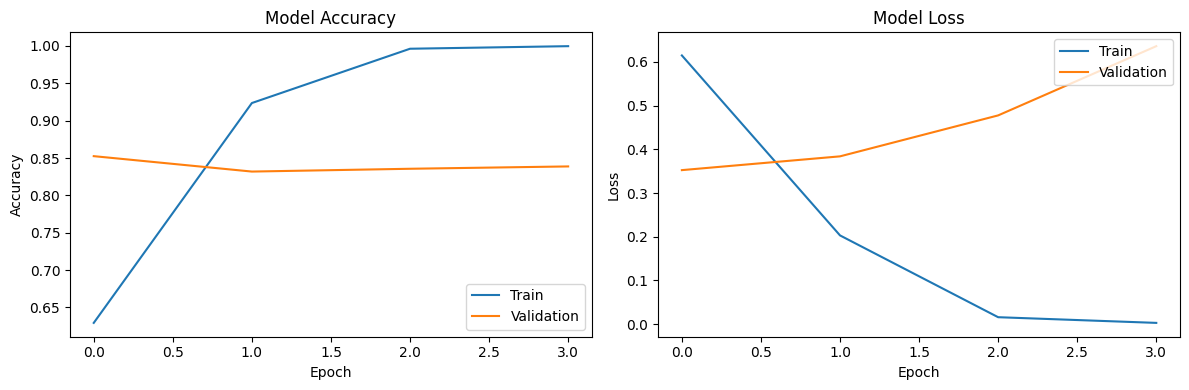

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# 1. Load and preprocess the data
def load_and_preprocess_data(data_path, sample_size=None):
    # Load the dataset
    df = pd.read_csv(data_path)

    if sample_size:
        df = df.sample(n=sample_size, random_state=42)

    # Basic EDA
    print("Dataset shape:", df.shape)
    print("\nSentiment distribution:")
    print(df['sentiment'].value_counts(normalize=True))

    return df

# 2. Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and digits
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    return ' '.join(tokens)

# 3. Prepare data for model
def prepare_data(df, max_words=10000, max_len=200):
    # Preprocess text
    df['processed_review'] = df['review'].apply(preprocess_text)

    # Convert sentiment to numerical
    le = LabelEncoder()
    df['sentiment_encoded'] = le.fit_transform(df['sentiment'])

    # Tokenize text
    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(df['processed_review'])
    sequences = tokenizer.texts_to_sequences(df['processed_review'])

    # Pad sequences
    X = pad_sequences(sequences, maxlen=max_len)
    y = df['sentiment_encoded'].values

    return X, y, tokenizer

# 4. Build model - Corrected Architecture
def build_model(max_words, max_len, embedding_dim=100):
    model = Sequential([
        Embedding(max_words, embedding_dim, input_length=max_len),
        Flatten(),  # Add Flatten layer to reduce dimensions
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 5. Visualize training history
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='lower right')

    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')

    plt.tight_layout()
    plt.show()

# Main execution
def main():
    # Hyperparameters
    MAX_WORDS = 10000
    MAX_LEN = 200
    EMBEDDING_DIM = 100
    SAMPLE_SIZE = 10000  # Adjust based on your computational resources

    # 1. Load and preprocess data
    print("Loading and preprocessing data...")
    df = load_and_preprocess_data('/content/drive/MyDrive/Colab Notebooks/NNDL/IMDB Dataset.csv', sample_size=SAMPLE_SIZE)

    # 2. Prepare data for model
    print("Preparing data for model...")
    X, y, tokenizer = prepare_data(df, MAX_WORDS, MAX_LEN)

    # 3. Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 4. Build and train model
    print("Building and training model...")
    model = build_model(MAX_WORDS, MAX_LEN, EMBEDDING_DIM)

    # Print model summary
    model.summary()

    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping]
    )

    # 5. Evaluate model
    print("Evaluating model...")
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test accuracy: {accuracy:.4f}")

    # 6. Visualize results
    plot_history(history)

if __name__ == "__main__":
    main()

# Inference for the Sentimental Analysis

## What is the process
what this model essentially does is . its takes a dataset of textual data devided into categories of positive and negative classes based on its content the neural network has no idea on what this textual data means .

Hence we are training the model to understand the data based on the categories which are already given to it it splits the data into training and testing set.

As we are dealing with textual data and we have to convert this textual dat ato machine understandable format . we are using nltk packages to vectorize the text and convert it to numerical data for easier analysis. that is what is happeing in the text preprocessing section and we are cleaning the data to remove stopwords and other words that are not important for this analysis


## Use of the ReLU and sigmoid activation functions.

In our sentiment analysis model, we use two key "activation functions" - ReLU and sigmoid. ReLU is like an on/off switch in the middle layers of our network: if it sees a positive number, it lets it through; if it sees a negative number, it changes it to zero. This helps the model learn complex patterns efficiently. At the end of our model, we use the sigmoid function, which squishes any number into a value between 0 and 1 - perfect for deciding if a movie review is negative (closer to 0) or positive (closer to 1). To measure how well our model is doing, we use binary cross-entropy loss, which is like a scoring system that harshly penalizes the model when it's confidently wrong (like saying a positive review is definitely negative) and gently corrects it when it's close to the right answer.
ReLU doesn't saturate for positive values, allowing for faster learning in deep neural networks


## Binary cross-entropy is suitable for this task.

Binary cross-entropy is suitable for this task because the model is performing a binary classification, where the goal is to distinguish between two classes: positive and negative sentiments. Binary cross-entropy measures the difference between the predicted probability of a class (between 0 and 1) and the actual class label (0 or 1). It effectively punishes incorrect predictions and helps the model optimize to output probabilities close to the correct labels, making it ideal for this task of sentiment analysis, where each review falls into one of two categories.

